In [142]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from operator import add
import math

In [5]:
url = 'https://raw.githubusercontent.com/Lightning-AI/dl-fundamentals/main/unit01-ml-intro/1.6-perceptron-in-python/perceptron_toydata-truncated.txt'
df = pd.read_csv(url, sep='\t')

In [7]:
df.head()

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0


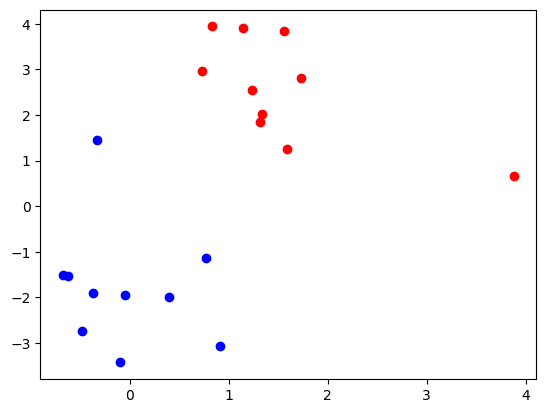

In [12]:
plt.scatter(df[df.label==0].x1, df[df.label==0].x2, c='blue')
plt.scatter(df[df.label==1].x1, df[df.label==1].x2, c='red')

In [152]:
class Perpeptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [.0 for _ in range(num_features)]
        self.bias = .0

    def forward(self, x):
        weighted_sum_z = np.dot(x, self.weights) + self.bias
        prediction = 1 if weighted_sum_z > .0 else 0
        return prediction

    def update(self, x, true_y):
        prediction = self.forward(x)
        error = true_y - prediction
        self.bias += error
        self.weights = list(map(add, self.weights, map(lambda v: error*v, x)))
        return error

In [111]:
ppn = Perpeptron(num_features=2)

x = [1.1, 2.1]
ppn.update(x,  1)

print("w: ", ppn.weights)
print("b: ", ppn.bias)

w:  [1.1, 2.1]
b:  1


In [112]:
def train(model, X, y, epoch=5):

    for e in range(epoch):
        error_count = 0
        
        for x, y_ in list(zip([X.iloc[i] for i in range(X.shape[0])], y)):
            error = model.update(x,y_)
            error_count += abs(error)

        print(f"Epoch {e+1} errors {error_count}")

In [160]:
X_train = df.sample(15, random_state=5).copy()
X_test = df.loc[~df.isin(X_train).all(axis=1),:]
y_train = X_train.iloc[:,2]
y_test = X_test.iloc[:,2]
X_train = X_train.drop('label', axis=1)
X_test = X_test.drop('label', axis=1)

In [161]:
ppn = Perpeptron(num_features=2)

train(model=ppn, X=X_train, y=y_train)

Epoch 1 errors 2
Epoch 2 errors 1
Epoch 3 errors 0
Epoch 4 errors 0
Epoch 5 errors 0


In [158]:
def accuracy(model, X, y):
    correct = .0

    for x, y_ in list(zip([X.iloc[i] for i in range(X.shape[0])], y)):
        prediction = model.forward(x)
        correct += int(prediction == y_)
    
    return correct / len(y)

In [164]:
accuracy(ppn, X_train, y_train)

1.0

In [167]:
def plot_boundary(model, x1_min=-20, x1_max=20):
    w1,w2 = model.weights[0], model.weights[1]
    b = model.bias

    x2_min = (-(w1*x1_min)-b)/w2
    x2_max = (-(w1*x1_max)-b)/w2
    return x1_min, x1_max, x2_min, x2_max

(-5.0, 5.0)

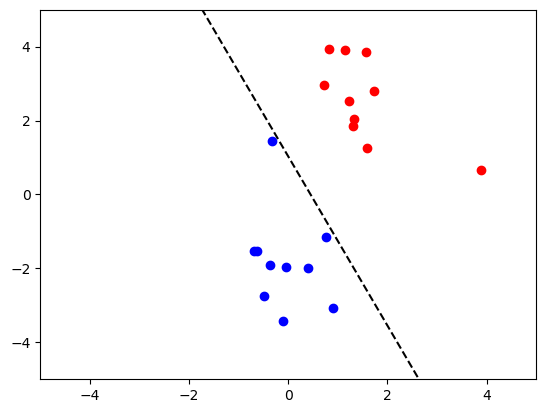

In [171]:
x1_min, x1_max, x2_min, x2_max = plot_boundary(ppn)
plt.scatter(df[df.label==0].x1, df[df.label==0].x2, c='blue')
plt.scatter(df[df.label==1].x1, df[df.label==1].x2, c='red')
plt.plot([x1_min,x1_max], [x2_min, x2_max], c='black', linestyle='--')
plt.xlim([-5,5])
plt.ylim([-5,5])